In [1]:
#Analysis

import pandas as pd
import numpy as np

#Plotting

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing csv file to panda dataframe

ireland_crime_report_2003_2019 = pd.read_csv("IRELAND_CRIME_GARDA_DIVISION_wise_2003-2019.csv")
icr= ireland_crime_report_2003_2019

gardastations = pd.read_csv("garda_stations.csv", encoding=('ISO-8859-1'),low_memory= False)

In [3]:
icr.head()

,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3
0,NORTHERN REGION,CAVAN/MONAGHAN,111,Murder,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,NORTHERN REGION,CAVAN/MONAGHAN,112,Manslaughter,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,NORTHERN REGION,CAVAN/MONAGHAN,113,Infanticide,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NORTHERN REGION,CAVAN/MONAGHAN,12,Dangerous driving leading to death,HOMICIDE OFFENCES,1,0,1,0,0,...,1,1,1,0,0,0,1,0,0,0
4,NORTHERN REGION,CAVAN/MONAGHAN,21,Rape and sexual assault,SEXUAL OFFENCES,24,15,5,5,14,...,16,8,14,23,21,13,23,19,20,17


In [4]:
# I will use gardastations dataframe to merge stations column from gardastations dataset and garda division column from
ireland_crime_report_2003_2019.

gardastations.head()

,id,Station,Divisions,x,y,"Attempts or threats to murder, assaults, harassments and related offences 2004","Attempts or threats to murder, assaults, harassments and related offences 2005","Attempts or threats to murder, assaults, harassments and related offences 2006","Attempts or threats to murder, assaults, harassments and related offences 2007","Attempts or threats to murder, assaults, harassments and related offences 2008",...,"Offences against government, justice procedures and organisation of crime 2007","Offences against government, justice procedures and organisation of crime 2008","Offences against government, justice procedures and organisation of crime 2009","Offences against government, justice procedures and organisation of crime 2010","Offences against government, justice procedures and organisation of crime 2011","Offences against government, justice procedures and organisation of crime 2012","Offences against government, justice procedures and organisation of crime 2013","Offences against government, justice procedures and organisation of crime 2014","Offences against government, justice procedures and organisation of crime 2015","Offences against government, justice procedures and organisation of crime 2016*"
0,20441,Abbeyfeale,Limerick Division,112219.0,126928.0,25,38,25,40,45,...,1,1,11,15,5,7,7,3,0,0
1,20117,Abbeyleix,Laois/Offaly Division,244196.0,184819.0,9,12,14,12,34,...,3,2,1,0,0,5,3,2,5,0
2,20424,Adare,Limerick Division,146337.0,146092.0,1,3,0,6,3,...,0,0,0,0,0,0,0,5,2,0
3,20217,Aglish,Waterford Division,212252.0,91029.0,4,4,3,1,2,...,0,0,0,1,0,0,0,0,0,0
4,20522,Ahascragh,Galway Division,178054.0,238416.0,1,0,1,1,4,...,0,0,2,3,1,0,0,0,0,0


In [5]:
# Dropping duplicates and missing values in Dataframe
#Firstly find if there is any missing values from each columns.

print(icr.isna().sum())


REGION             0
GARDA DIVISION     0
OFFENCE CODE       0
OFFENCE            0
TYPE OF OFFENCE    0
                  ..
2018Q3             0
2018Q4             0
2019Q1             0
2019Q2             0
2019Q3             0
Length: 72, dtype: int64


In [7]:
icr_duplicates= icr.drop_duplicates().sum()

In [8]:
icr_duplicates

REGION             NORTHERN REGIONNORTHERN REGIONNORTHERN REGIONN...
GARDA DIVISION     CAVAN/MONAGHANCAVAN/MONAGHANCAVAN/MONAGHANCAVA...
OFFENCE CODE                                                  695856
OFFENCE            MurderManslaughterInfanticideDangerous driving...
TYPE OF OFFENCE    HOMICIDE OFFENCESHOMICIDE OFFENCESHOMICIDE OFF...
                                         ...                        
2018Q3                                                         54388
2018Q4                                                         56103
2019Q1                                                         53623
2019Q2                                                         56946
2019Q3                                                         57897
Length: 72, dtype: object

In [11]:
icr.shape

(1624, 72)

In [12]:
icr.columns

Index(['REGION', 'GARDA DIVISION', 'OFFENCE CODE', 'OFFENCE',
       'TYPE OF OFFENCE', '2003Q1', '2003Q2', '2003Q3', '2003Q4', '2004Q1',
       '2004Q2', '2004Q3', '2004Q4', '2005Q1', '2005Q2', '2005Q3', '2005Q4',
       '2006Q1', '2006Q2', '2006Q3', '2006Q4', '2007Q1', '2007Q2', '2007Q3',
       '2007Q4', '2008Q1', '2008Q2', '2008Q3', '2008Q4', '2009Q1', '2009Q2',
       '2009Q3', '2009Q4', '2010Q1', '2010Q2', '2010Q3', '2010Q4', '2011Q1',
       '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4',
       '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3',
       '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2',
       '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
       '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3'],
      dtype='object')

In [13]:
#indexing

icr.index

RangeIndex(start=0, stop=1624, step=1)

In [14]:
icr_ind= icr.set_index(["REGION"])

In [15]:
icr_ind

,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,2004Q2,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3
REGION,,,,,,,,,,,,,,,,,,,,,
NORTHERN REGION,CAVAN/MONAGHAN,111,Murder,HOMICIDE OFFENCES,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
NORTHERN REGION,CAVAN/MONAGHAN,112,Manslaughter,HOMICIDE OFFENCES,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
NORTHERN REGION,CAVAN/MONAGHAN,113,Infanticide,HOMICIDE OFFENCES,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NORTHERN REGION,CAVAN/MONAGHAN,12,Dangerous driving leading to death,HOMICIDE OFFENCES,1,0,1,0,0,0,...,1,1,1,0,0,0,1,0,0,0
NORTHERN REGION,CAVAN/MONAGHAN,21,Rape and sexual assault,SEXUAL OFFENCES,24,15,5,5,14,13,...,16,8,14,23,21,13,23,19,20,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DUBLIN METROPOLITAN REGION,D.M.R. WESTERN,136,Social code offences (n.e.c.),PUBLIC ORDER AND OTHER SOCIAL CODE OFFENCES,8,5,6,6,7,11,...,8,5,3,10,4,5,5,6,16,9
DUBLIN METROPOLITAN REGION,D.M.R. WESTERN,151,Offences against government and its agents,OFFENCES AGAINST GOVERNMENT/ JUSTICE PROCEDURE...,3,0,0,7,0,0,...,2,3,0,2,0,0,2,5,4,5
DUBLIN METROPOLITAN REGION,D.M.R. WESTERN,152,Organisation of crime and conspiracy to commit...,OFFENCES AGAINST GOVERNMENT/ JUSTICE PROCEDURE...,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1


In [16]:
icr_ind.sort_index(level=["REGION"], ascending=True)

,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,2004Q2,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3
REGION,,,,,,,,,,,,,,,,,,,,,
DUBLIN METROPOLITAN REGION,D.M.R. WESTERN,157,Offences while in custody/ breach of court orders,OFFENCES AGAINST GOVERNMENT/ JUSTICE PROCEDURE...,134,102,128,116,121,85,...,280,318,308,410,447,393,455,437,417,305
DUBLIN METROPOLITAN REGION,D.M.R. NORTH CENTRAL,135,Regulated betting/money/ collection/trading of...,PUBLIC ORDER AND OTHER SOCIAL CODE OFFENCES,12,13,22,38,15,13,...,10,7,9,5,3,18,9,4,2,3
DUBLIN METROPOLITAN REGION,D.M.R. NORTH CENTRAL,136,Social code offences (n.e.c.),PUBLIC ORDER AND OTHER SOCIAL CODE OFFENCES,46,63,51,39,35,16,...,192,158,180,110,175,130,121,129,44,119
DUBLIN METROPOLITAN REGION,D.M.R. NORTH CENTRAL,151,Offences against government and its agents,OFFENCES AGAINST GOVERNMENT/ JUSTICE PROCEDURE...,1,3,1,4,2,2,...,2,5,3,1,0,0,4,1,13,4
DUBLIN METROPOLITAN REGION,D.M.R. NORTH CENTRAL,152,Organisation of crime and conspiracy to commit...,OFFENCES AGAINST GOVERNMENT/ JUSTICE PROCEDURE...,2,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WESTERN REGION,MAYO,711,Aggravated burglary,BURGLARY AND RELATED OFFENCES,0,0,0,0,0,0,...,0,0,0,2,1,0,2,1,0,1
WESTERN REGION,MAYO,712,Burglary (not aggravated),BURGLARY AND RELATED OFFENCES,63,114,95,76,59,54,...,52,62,52,77,45,48,34,37,37,52
WESTERN REGION,MAYO,713,Possession of an article (with intent to burgl...,BURGLARY AND RELATED OFFENCES,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [24]:
#Sorting

icr_srt= icr.sort_values(by=['REGION', 'TYPE OF OFFENCE'], ascending=[True, True], inplace=True)
icr[['REGION', 'TYPE OF OFFENCE']].head(50)

,REGION,TYPE OF OFFENCE
1282,DUBLIN METROPOLITAN REGION,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...
1283,DUBLIN METROPOLITAN REGION,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...
1284,DUBLIN METROPOLITAN REGION,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...
1285,DUBLIN METROPOLITAN REGION,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...
1286,DUBLIN METROPOLITAN REGION,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...
1340,DUBLIN METROPOLITAN REGION,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...
1341,DUBLIN METROPOLITAN REGION,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...
1342,DUBLIN METROPOLITAN REGION,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...
1343,DUBLIN METROPOLITAN REGION,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...
1344,DUBLIN METROPOLITAN REGION,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...


In [27]:
#Grouping

regionalcrimes = icr.groupby(['REGION']).sum()
regionalcrimes.drop('OFFENCE CODE', axis=1, inplace=True)
regionalcrimes.sum(axis=1)

REGION
DUBLIN METROPOLITAN REGION    1687832
EASTERN REGION                 553256
NORTHERN REGION                382487
SOUTH EASTERN REGION           431838
SOUTHERN REGION                690862
WESTERN REGION                 360367
dtype: int64

In [28]:
divisionalcrimes = icr.groupby(['GARDA DIVISION']).sum()
divisionalcrimes.drop('OFFENCE CODE', axis=1, inplace=True)
divisionalcrimes.sum(axis=1) / len(divisionalcrimes.columns)

GARDA DIVISION
CAVAN/MONAGHAN          1384.761194
CLARE                   1085.701493
CORK CITY               3627.402985
CORK NORTH              1218.134328
CORK WEST                857.000000
D.M.R. EASTERN          2336.671642
D.M.R. NORTH CENTRAL    5066.432836
D.M.R. NORTHERN         4386.522388
D.M.R. SOUTH CENTRAL    4782.402985
D.M.R. SOUTHERN         3728.791045
D.M.R. WESTERN          4890.701493
DONEGAL                 1585.194030
GALWAY                  2446.328358
KERRY                   1420.835821
KILDARE                 2183.835821
KILKENNY/CARLOW         1660.402985
LAOIS/OFFALY            1609.910448
LIMERICK                3188.000000
LOUTH                   1795.134328
MAYO                    1014.880597
MEATH                   1545.671642
ROSCOMMON/LONGFORD       831.701493
SLIGO/LEITRIM            943.671642
TIPPERARY               1508.283582
WATERFORD               1839.223881
WESTMEATH               1173.850746
WEXFORD                 1437.432836
WICKLOW      

In [29]:
no_crime_recorded_per_county = icr[icr.columns[5:]].sum(axis=1)
no_crime_recorded_per_county = no_crime_recorded_per_county.rename('COUNT')
no_crime_recorded_per_county = no_crime_recorded_per_county.to_frame()
no_crime_recorded_per_county['OFFENCE'] = icr['OFFENCE']
no_crime_recorded_per_county['GARDA DIVISION'] = icr['GARDA DIVISION']
idx = no_crime_recorded_per_county.groupby('GARDA DIVISION')['COUNT'].transform(max) == no_crime_recorded_per_county['COUNT']
no_crime_recorded_per_county[idx]


,COUNT,OFFENCE,GARDA DIVISION
1391,62216,Offences while in custody/ breach of court orders,D.M.R. NORTH CENTRAL
1309,75128,Other thefts/ handling stolen property,D.M.R. SOUTH CENTRAL
1425,53654,Other thefts/ handling stolen property,D.M.R. NORTHERN
1483,39847,Other thefts/ handling stolen property,D.M.R. SOUTHERN
1541,32141,Other thefts/ handling stolen property,D.M.R. EASTERN
1599,55242,Other thefts/ handling stolen property,D.M.R. WESTERN
976,12885,Disorderly conduct,WESTMEATH
787,17156,Other thefts/ handling stolen property,LAOIS/OFFALY
845,21099,Other thefts/ handling stolen property,MEATH
903,21627,Other thefts/ handling stolen property,WICKLOW


In [30]:
#Slicing

icr[:100]


,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3
1282,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,311,Murder-attempt,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0
1283,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,312,Murder-threat,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...,0,0,1,0,0,...,14,8,14,7,9,22,15,10,25,20
1284,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,33,Harassment and related offences,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...,10,13,2,7,7,...,21,13,15,31,17,20,20,22,19,20
1285,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,34,Assault causing harm/ poisoning,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...,84,76,49,60,66,...,78,70,98,85,77,81,92,74,95,86
1286,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,35,Other assault,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...,104,116,85,104,106,...,242,212,194,197,205,178,235,208,218,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,DUBLIN METROPOLITAN REGION,D.M.R. WESTERN,1221,Litter offences,DAMAGE TO PROPERTY AND ENVIRONMENT,0,1,1,0,0,...,0,2,2,1,2,0,0,3,0,1
1287,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,411,Dangerous driving causing serious bodily harm,DANGEROUS OR NEGLIGENT ACTS,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1288,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,412,Driving/in charge of a vehicle while over lega...,DANGEROUS OR NEGLIGENT ACTS,118,111,115,113,96,...,42,36,40,35,36,48,46,29,35,22
1289,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,413,Driving/in charge of a vehicle under the influ...,DANGEROUS OR NEGLIGENT ACTS,0,0,0,0,1,...,1,2,0,0,3,3,1,4,3,9


In [31]:
#iloc

icr.iloc[0:, :72]

,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3
1282,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,311,Murder-attempt,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0
1283,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,312,Murder-threat,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...,0,0,1,0,0,...,14,8,14,7,9,22,15,10,25,20
1284,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,33,Harassment and related offences,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...,10,13,2,7,7,...,21,13,15,31,17,20,20,22,19,20
1285,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,34,Assault causing harm/ poisoning,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...,84,76,49,60,66,...,78,70,98,85,77,81,92,74,95,86
1286,DUBLIN METROPOLITAN REGION,D.M.R. SOUTH CENTRAL,35,Other assault,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...,104,116,85,104,106,...,242,212,194,197,205,178,235,208,218,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,WESTERN REGION,ROSCOMMON/LONGFORD,111,Explosives/ chemical weapons offences,WEAPONS AND EXPLOSIVES OFFENCES,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,2
447,WESTERN REGION,ROSCOMMON/LONGFORD,1121,Discharging a firearm,WEAPONS AND EXPLOSIVES OFFENCES,0,0,1,0,1,...,1,0,0,1,0,2,1,1,2,2
448,WESTERN REGION,ROSCOMMON/LONGFORD,1122,Possession of a firearm,WEAPONS AND EXPLOSIVES OFFENCES,0,1,0,0,1,...,1,2,0,0,0,1,0,0,0,4
449,WESTERN REGION,ROSCOMMON/LONGFORD,113,Offensive weapons offences (n.e.c.),WEAPONS AND EXPLOSIVES OFFENCES,3,3,2,1,1,...,7,12,8,12,12,4,9,4,14,6


In [33]:
quarter_periods_crimes = icr[icr.columns[5:]].sum()

In [34]:
#looping and iterrows

quarter_periods_differences = [quarter_period_crimes[i-1] - quarter_period_crimes[i] for i in range(1, len(quarter_period_crimes))] 
avgerage_quarter_periods_differences = [sum(quarter_periods_differences[i::4]) / len(quarter_periods_differences[i::4]) for i in range(0,4)]

In [35]:
no_crimes_recorded_yearly = [sum(quarter_periods_crimes[i:i+4]) for i in range(0, len(quarter_period_crimes), 4)] 
years = range(2003, 2020)


In [36]:
#Merging dataframes
garda_division= icr["GARDA DIVISION"]

In [37]:
garda_station= gardastations["Station"]

In [39]:
joindata= pd.concat([garda_division, garda_station], axis=1)

In [40]:
joindata

,GARDA DIVISION,Station
0,CAVAN/MONAGHAN,Abbeyfeale
1,CAVAN/MONAGHAN,Abbeyleix
2,CAVAN/MONAGHAN,Adare
3,CAVAN/MONAGHAN,Aglish
4,CAVAN/MONAGHAN,Ahascragh
...,...,...
1619,D.M.R. WESTERN,NaN
1620,D.M.R. WESTERN,NaN
1621,D.M.R. WESTERN,NaN
1622,D.M.R. WESTERN,NaN


In [41]:
def line_plot(*args, **kwargs):
    plt.plot(args[0], args[1])

In [42]:
#Numpy

np_icr = np.array(icr)

In [43]:
np_icr

array([['DUBLIN METROPOLITAN REGION', 'D.M.R. SOUTH CENTRAL', 311, ...,
        0, 0, 0],
       ['DUBLIN METROPOLITAN REGION', 'D.M.R. SOUTH CENTRAL', 312, ...,
        10, 25, 20],
       ['DUBLIN METROPOLITAN REGION', 'D.M.R. SOUTH CENTRAL', 33, ...,
        22, 19, 20],
       ...,
       ['WESTERN REGION', 'ROSCOMMON/LONGFORD', 1122, ..., 0, 0, 4],
       ['WESTERN REGION', 'ROSCOMMON/LONGFORD', 113, ..., 4, 14, 6],
       ['WESTERN REGION', 'ROSCOMMON/LONGFORD', 114, ..., 0, 0, 0]],
      dtype=object)

In [45]:
np_2d = np.array(np_icr)

In [46]:
np_2d

array([['DUBLIN METROPOLITAN REGION', 'D.M.R. SOUTH CENTRAL', 311, ...,
        0, 0, 0],
       ['DUBLIN METROPOLITAN REGION', 'D.M.R. SOUTH CENTRAL', 312, ...,
        10, 25, 20],
       ['DUBLIN METROPOLITAN REGION', 'D.M.R. SOUTH CENTRAL', 33, ...,
        22, 19, 20],
       ...,
       ['WESTERN REGION', 'ROSCOMMON/LONGFORD', 1122, ..., 0, 0, 4],
       ['WESTERN REGION', 'ROSCOMMON/LONGFORD', 113, ..., 4, 14, 6],
       ['WESTERN REGION', 'ROSCOMMON/LONGFORD', 114, ..., 0, 0, 0]],
      dtype=object)

In [47]:
np_2d.shape

(1624, 72)

In [48]:
np_2d[:,5:70]

array([[0, 0, 2, ..., 0, 0, 0],
       [0, 0, 1, ..., 22, 15, 10],
       [10, 13, 2, ..., 20, 20, 22],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [3, 3, 2, ..., 4, 9, 4],
       [0, 0, 0, ..., 3, 1, 0]], dtype=object)

In [49]:
offenceandcode= icr[['OFFENCE CODE', 'OFFENCE']]
offenceandcode.head(20)
offenceandcode.duplicated().sum()

1566

In [50]:
icr[icr['OFFENCE'].duplicated(keep= 'first')].head(5)

,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3
1340,DUBLIN METROPOLITAN REGION,D.M.R. NORTH CENTRAL,311,Murder-attempt,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1341,DUBLIN METROPOLITAN REGION,D.M.R. NORTH CENTRAL,312,Murder-threat,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...,0,0,0,0,0,...,12,11,5,11,12,18,14,26,14,10
1342,DUBLIN METROPOLITAN REGION,D.M.R. NORTH CENTRAL,33,Harassment and related offences,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...,11,6,8,2,12,...,12,15,17,14,11,16,7,14,10,12
1343,DUBLIN METROPOLITAN REGION,D.M.R. NORTH CENTRAL,34,Assault causing harm/ poisoning,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...,64,45,45,48,57,...,79,64,75,65,88,91,75,91,84,69
1344,DUBLIN METROPOLITAN REGION,D.M.R. NORTH CENTRAL,35,Other assault,ATTEMPTS/THREATS TO MURDER/ASSAULTS/ HARASSMEN...,100,84,82,84,89,...,162,156,176,180,200,192,208,222,245,216


In [56]:
icr['OFFENCE'].drop_duplicates()

1282                                       Murder-attempt
1283                                        Murder-threat
1284                      Harassment and related offences
1285                      Assault causing harm/ poisoning
1286                                        Other assault
1303                                  Aggravated burglary
1304                            Burglary (not aggravated)
1305    Possession of an article (with intent to burgl...
1311                                 Importation of drugs
1312                  Cultivation or manufacture of drugs
1313               Possession of drugs for sale or supply
1314                 Possession of drugs for personal use
1315                                  Other drug offences
1321                                                Arson
1322                          Criminal damage (not arson)
1323                                      Litter offences
1287        Dangerous driving causing serious bodily harm
1288    Drivin

In [57]:
icr[['OFFENCE', 'OFFENCE CODE']].head(20)

,OFFENCE,OFFENCE CODE
1282,Murder-attempt,311
1283,Murder-threat,312
1284,Harassment and related offences,33
1285,Assault causing harm/ poisoning,34
1286,Other assault,35
1340,Murder-attempt,311
1341,Murder-threat,312
1342,Harassment and related offences,33
1343,Assault causing harm/ poisoning,34
1344,Other assault,35


In [59]:
icr[['OFFENCE', 'OFFENCE CODE']].tail(20)

,OFFENCE,OFFENCE CODE
272,Explosives/ chemical weapons offences,111
273,Discharging a firearm,1121
274,Possession of a firearm,1122
275,Offensive weapons offences (n.e.c.),113
276,Fireworks offences,114
330,Explosives/ chemical weapons offences,111
331,Discharging a firearm,1121
332,Possession of a firearm,1122
333,Offensive weapons offences (n.e.c.),113
334,Fireworks offences,114


In [60]:
#Dictionary

offencerecord= {"Murder-threat":311, "Murder-threat":312, "Harassment and related offences":33, "Assault causingharm/poisoning":34, 
               "Other assault":35, "Explosives/chemical weapons offences":111, "Discharging a firearm":1121, "Possession of a firearm":1121, 
               "Offensive weapons offences":113, "Fireworks offences":114, "Manslaughter":112, "Dangerous driving leading to death":12, 
               "rape and sexual offences":21, "Other sexual offences":22, "Dangerous driving causing seriousbodily harm":411, 
               "Abandoning a child/ child neglect and cruelty":422, "Unseaworthy/dangerous use of boat or ship": 423, "Endangering traffic offences":425, 
               "False imprisonment":511}

In [61]:
offencerecord['False imprisonment']

511

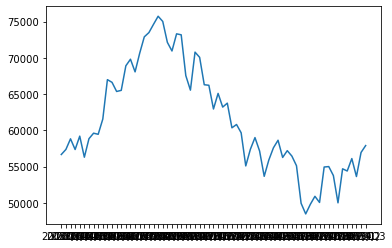

In [78]:
#Seaborn, Matplotlib

quarter_periods_crimes = icr[icr.columns[5:]].sum()
line_plot(quarter_periods_crimes.index, quarter_periods_crimes.tolist(), title = 'Crimes per quarter', xlabel = 'quarter', ylabel = 'no. crimes')

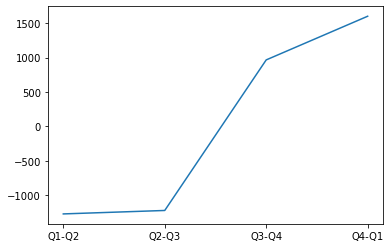

In [70]:
interquarters = ['Q1-Q2', 'Q2-Q3', 'Q3-Q4', 'Q4-Q1']
line_plot(interquarters, avgerage_quarter_periods_differences, title='Avgerage quarter periods differences', xlabel='Quarters', ylabel='Difference')

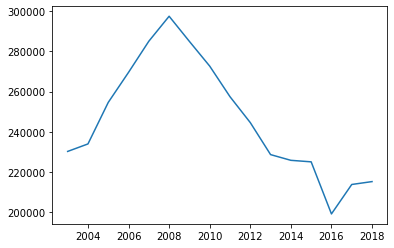

In [71]:
no_crimes= line_plot(years[0:len(years)-1], no_crimes_recorded_yearly[0:len(no_crimes_recorded_yearly)-1], title = 'Crimes per year', xlabel = 'year', ylabel = 'no. crimes')

In [72]:
divisional_crime_ranking = divisional_crimes.sum(axis=1) / divisional_crimes.sum(axis=1).sum()
divisional_crime_ranking.sort_values(ascending=False)

GARDA DIVISION
D.M.R. NORTH CENTRAL    0.082659
D.M.R. WESTERN          0.079792
D.M.R. SOUTH CENTRAL    0.078025
D.M.R. NORTHERN         0.071566
D.M.R. SOUTHERN         0.060835
CORK CITY               0.059181
LIMERICK                0.052012
GALWAY                  0.039912
D.M.R. EASTERN          0.038123
KILDARE                 0.035629
WATERFORD               0.030007
LOUTH                   0.029288
WICKLOW                 0.028458
KILKENNY/CARLOW         0.027090
LAOIS/OFFALY            0.026266
DONEGAL                 0.025862
MEATH                   0.025218
TIPPERARY               0.024608
WEXFORD                 0.023452
KERRY                   0.023181
CAVAN/MONAGHAN          0.022592
CORK NORTH              0.019874
WESTMEATH               0.019151
CLARE                   0.017713
MAYO                    0.016558
SLIGO/LEITRIM           0.015396
CORK WEST               0.013982
ROSCOMMON/LONGFORD      0.013569
dtype: float64

<AxesSubplot:xlabel='GARDA DIVISION'>

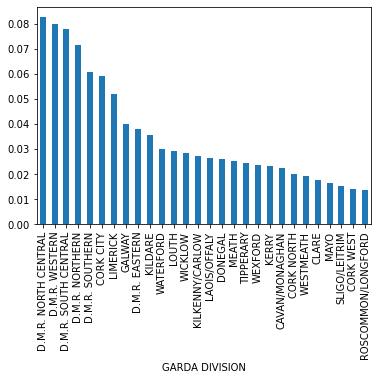

In [73]:
divisional_crime_ranking.sort_values(ascending=False).plot.bar()

In [74]:
national_offence_counted = icr.groupby('OFFENCE').sum().drop('OFFENCE CODE', axis=1).sum(axis=1)

In [75]:
national_offence_counted[:10]

OFFENCE
Abandoning a child/ child neglect and cruelty                  5239
Abduction of person under 16 years of age                       326
Aggravated burglary                                            4844
Arson                                                         31913
Assault causing harm/ poisoning                               63054
Blackmail or extortion                                          702
Burglary (not aggravated)                                    396339
Carjacking/ hijacking/unlawful seizure of aircraft/vessel      1586
Criminal damage (not arson)                                  520141
Cultivation or manufacture of drugs                            4362
dtype: int64

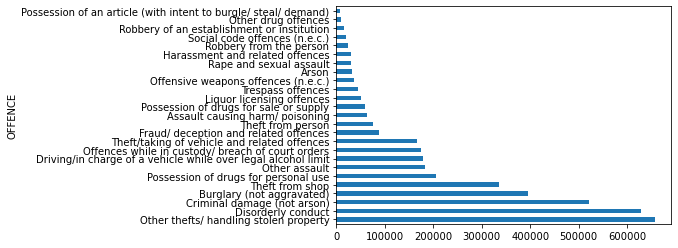

In [76]:
national_offence_counted.sort_values(ascending=False)[:25].plot.barh()
plt.show()